<a href="https://colab.research.google.com/github/BraunMichael/NanowireGrowthVisualization/blob/master/GeSnVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as Colors
import numpy as np
import re
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# df_original = pd.read_csv('./NewGeSnDataset.csv')
df_original = pd.read_csv('./UpdatedGeSn.csv')

df = df_original.copy()

# df = df.drop(columns=['XRD Measured'])
# # Only for new dataset
df = df.dropna(subset=['Sn Surface Coverage'])
df = df.apply(pd.to_numeric, errors='ignore')


In [0]:
df

In [0]:
# df['Sn Surface Coverage'] = df['Sn Surface Coverage'] * np.random.uniform(0.9,1.1,df.shape[0])
# df['XRD Sn Content'] = df['XRD Sn Content'] * np.random.uniform(0.9,1.1,df.shape[0])

# Sort the values by XRD Sn Content in descending order so the smallest Sn content values (circles) get drawn last (on top of everything else)
# Ties broken by Sn Surface Coverage 
df_resorted = df.sort_values(by=['XRD Sn Content', 'Sn Surface Coverage'], kind='mergesort', ascending=False)

# Have a dataframe with numerical values for position if needed (ie some plots can't plot catagorical data)
df_resorted_sub = df_resorted.replace({'Center':0, 'Andrew':1, 'Reflectometry':2}, inplace = False)

# sns.pairplot(df, hue = 'Position', corner=True, plot_kws={'alpha':0.4,'s':80},height = 4, diag_kind='hist')

colorMapDarkValue = 0.15 #(0 makes highest value black, going to 1)
RedPalette =  sns.cubehelix_palette(n_colors=30, rot = 0.5, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=False)
RedMap = sns.cubehelix_palette(n_colors=30, rot = 0.5, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=True)
RedMapMPL = Colors.LinearSegmentedColormap.from_list("test", RedPalette)

GreenPalette = sns.cubehelix_palette(n_colors=30, rot = -0.5, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=False)
GreenMap = sns.cubehelix_palette(n_colors=30, rot = -0.5, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=True)
GreenMapMPL = Colors.LinearSegmentedColormap.from_list("test", GreenPalette)

BluePalette = sns.cubehelix_palette(n_colors=30, rot = -0.1, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=False)
BlueMap = sns.cubehelix_palette(n_colors=30, rot = -0.1, light = 1, hue = 1, dark = colorMapDarkValue, as_cmap=True)
BlueMapMPL = Colors.LinearSegmentedColormap.from_list("test", BluePalette)

df_Center = df_resorted.loc[df_resorted['Position'] == 'Center']
df_Reflectometry = df_resorted.loc[df_resorted['Position'] == 'Reflectometry']
df_Andrew = df_resorted.loc[df_resorted['Position'] == 'Andrew']

In [0]:
df_Center

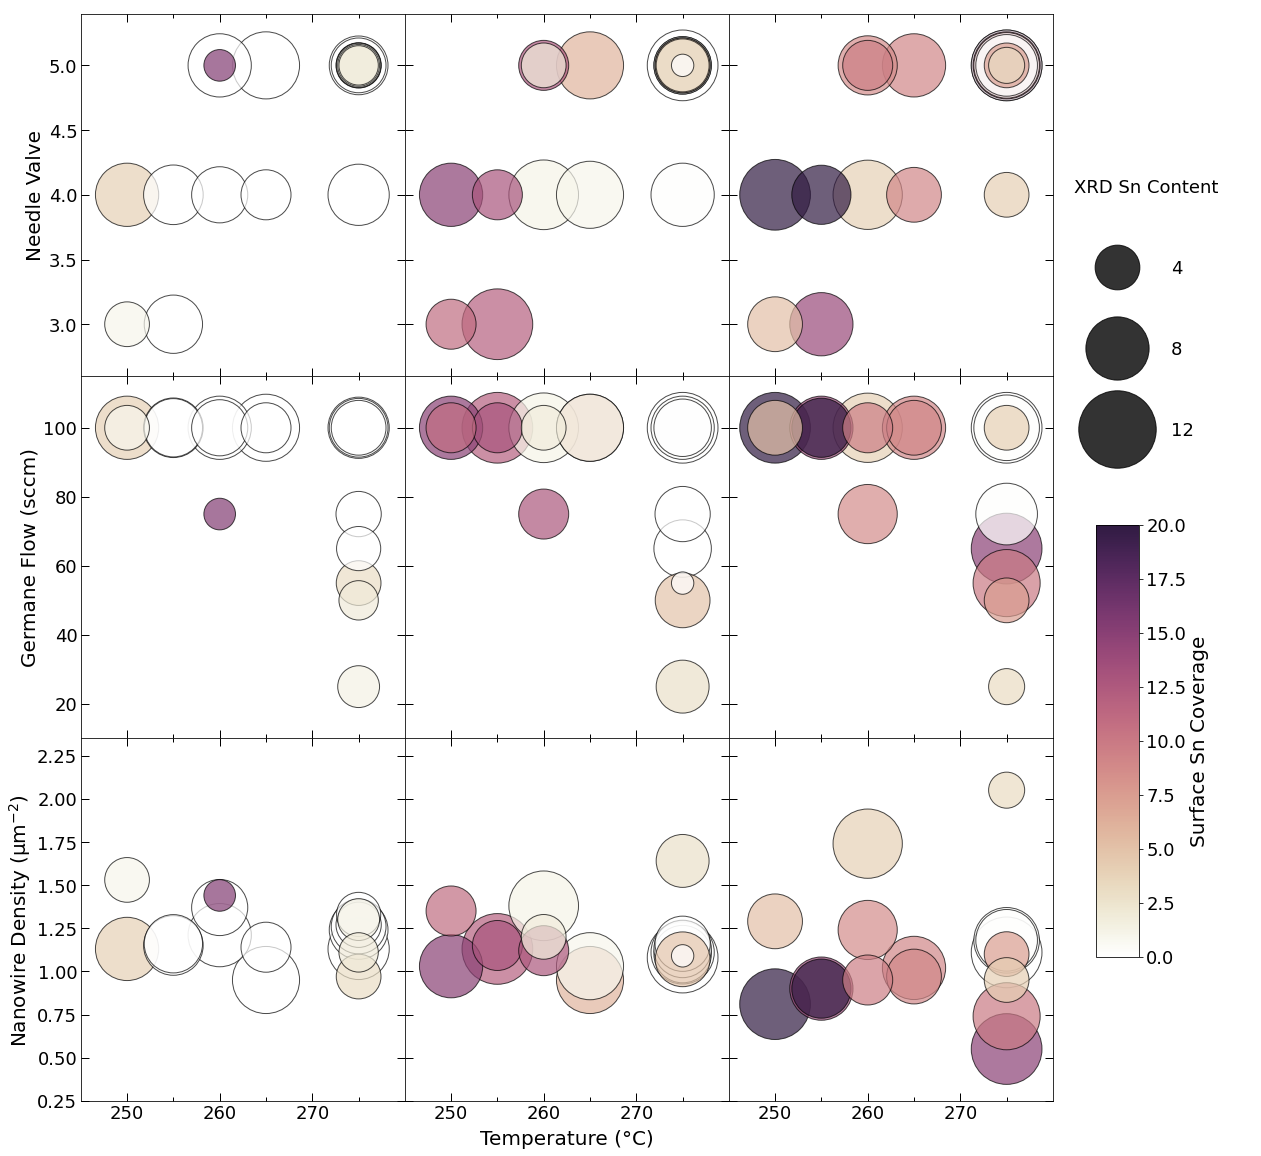

In [0]:
SnContentLegendList = [4, 8, 12]
circleScaleFactor = 500
centerPositionColormap = RedMapMPL
andrewPositionColormap = RedMapMPL
reflectometryPositionColormap = RedMapMPL
plotAlpha = 0.7

# Use the value from all the 
colorbarMax = df['Sn Surface Coverage'].max()
# colorbarMax = 6

percentRangeOverdraw = 0.2 # add 20% of range on each side for circle's to fit nicely

temperatureMin = df_Center["Temperature"].min()
temperatureMax = df_Center["Temperature"].max()
temperatureRange = temperatureMax - temperatureMin
lowerXLim = temperatureMin - percentRangeOverdraw*temperatureRange
upperXLim = temperatureMax + percentRangeOverdraw*temperatureRange

nvMin = df_Center["NV"].min()
nvMax = df_Center["NV"].max()
nvRange = nvMax - nvMin
lowerYLimNV = nvMin - percentRangeOverdraw*nvRange
upperYLimNV = nvMax + percentRangeOverdraw*nvRange


germaneFlowMin = df_Center["Germane Flow"].min()
germaneFlowMax = df_Center["Germane Flow"].max()
germaneFlowRange = germaneFlowMax - germaneFlowMin
lowerYLimGermaneFlow = germaneFlowMin - percentRangeOverdraw*germaneFlowRange
upperYLimGermaneFlow = germaneFlowMax + percentRangeOverdraw*germaneFlowRange

wireDensityMin = min(df_Center["Wire Density"].min(), df_Andrew["Wire Density"].min(), df_Reflectometry["Wire Density"].min())
wireDensityMax = max(df_Center["Wire Density"].max(), df_Andrew["Wire Density"].max(), df_Reflectometry["Wire Density"].max())
wireDensityRange = wireDensityMax - wireDensityMin
lowerYLimWireDensity = wireDensityMin - percentRangeOverdraw*wireDensityRange
upperYLimWireDensity = wireDensityMax + percentRangeOverdraw*wireDensityRange

fig, axs = plt.subplots(nrows = 3, ncols = 3, sharey = 'row', sharex = True, figsize=(9,9))
fig.set_figwidth(20)
fig.set_figheight(20)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.add_subplot(111, frameon = False, facecolor = 'white')

l1 = axs[0][0].scatter(df_Center['Temperature'], df_Center['NV'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[0][0].set_ylim(lowerYLimNV, upperYLimNV)
axs[0][0].set_ylabel("Needle Valve")

l2 = axs[0][1].scatter(df_Andrew['Temperature'], df_Andrew['NV'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l3 = axs[0][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['NV'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l4 = axs[1][0].scatter(df_Center['Temperature'], df_Center['Germane Flow'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[1][0].set_ylim(lowerYLimGermaneFlow, upperYLimGermaneFlow)
axs[1][0].set_ylabel("Germane Flow (sccm)")

l5 = axs[1][1].scatter(df_Andrew['Temperature'], df_Andrew['Germane Flow'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l6 = axs[1][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['Germane Flow'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l7 = axs[2][0].scatter(df_Center['Temperature'], df_Center['Wire Density'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[2][0].set_ylim(lowerYLimWireDensity, upperYLimWireDensity)
axs[2][0].set_ylabel("Nanowire Density (μm$^{-2}$)")

l8 = axs[2][1].scatter(df_Andrew['Temperature'], df_Andrew['Wire Density'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l9 = axs[2][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['Wire Density'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

for axList in axs:
  for ax in axList:
    ax.set_xlim(lowerXLim+0.01,upperXLim-0.01)
    ax.minorticks_on()
    ax.tick_params(which='both', axis='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', axis='both', direction='in', length=8, width=1)
    ax.tick_params(which='minor', axis='both', direction='in', length=4, width=1)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(1))


plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Temperature (°C)")
# This would set a centered y label
# plt.ylabel("NV")

fig.subplots_adjust(right=0.8)

# [horizontal position, vertical position, relative width, relative height]
colorbar_ax = fig.add_axes([0.83, 0.225, 0.03, 0.3])
cbar = fig.colorbar(l1, cax = colorbar_ax)
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.set_ylabel('Surface Sn Coverage')

# [horizontal position, vertical position, relative width, relative height]
legend_ax = fig.add_axes([0.85, 0.525, 0.03, 0.3])
legend_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
legend_ax.axis('off')
hiddenLegendHandles = []
hiddenLegendLabels = []
for SnContent in SnContentLegendList:
    hiddenLegendPlot = plt.scatter([], [], c='k', alpha=0.8, s=circleScaleFactor*SnContent)
    tempHandle, tempLabel = hiddenLegendPlot.legend_elements(prop="sizes")
    hiddenLegendHandles.extend(tempHandle)
    hiddenLegendLabels.extend(tempLabel)

plotLegend = legend_ax.legend(hiddenLegendHandles, SnContentLegendList, title = "XRD Sn Content", numpoints = 1, scatterpoints = 5, frameon = False, labelspacing = 3.5, handletextpad = 2, borderaxespad = 0,
                        loc='center', borderpad = 2)

fig.savefig('GeSnVisualization_inclRandomXRD.png', facecolor = 'white', edgecolor='none')


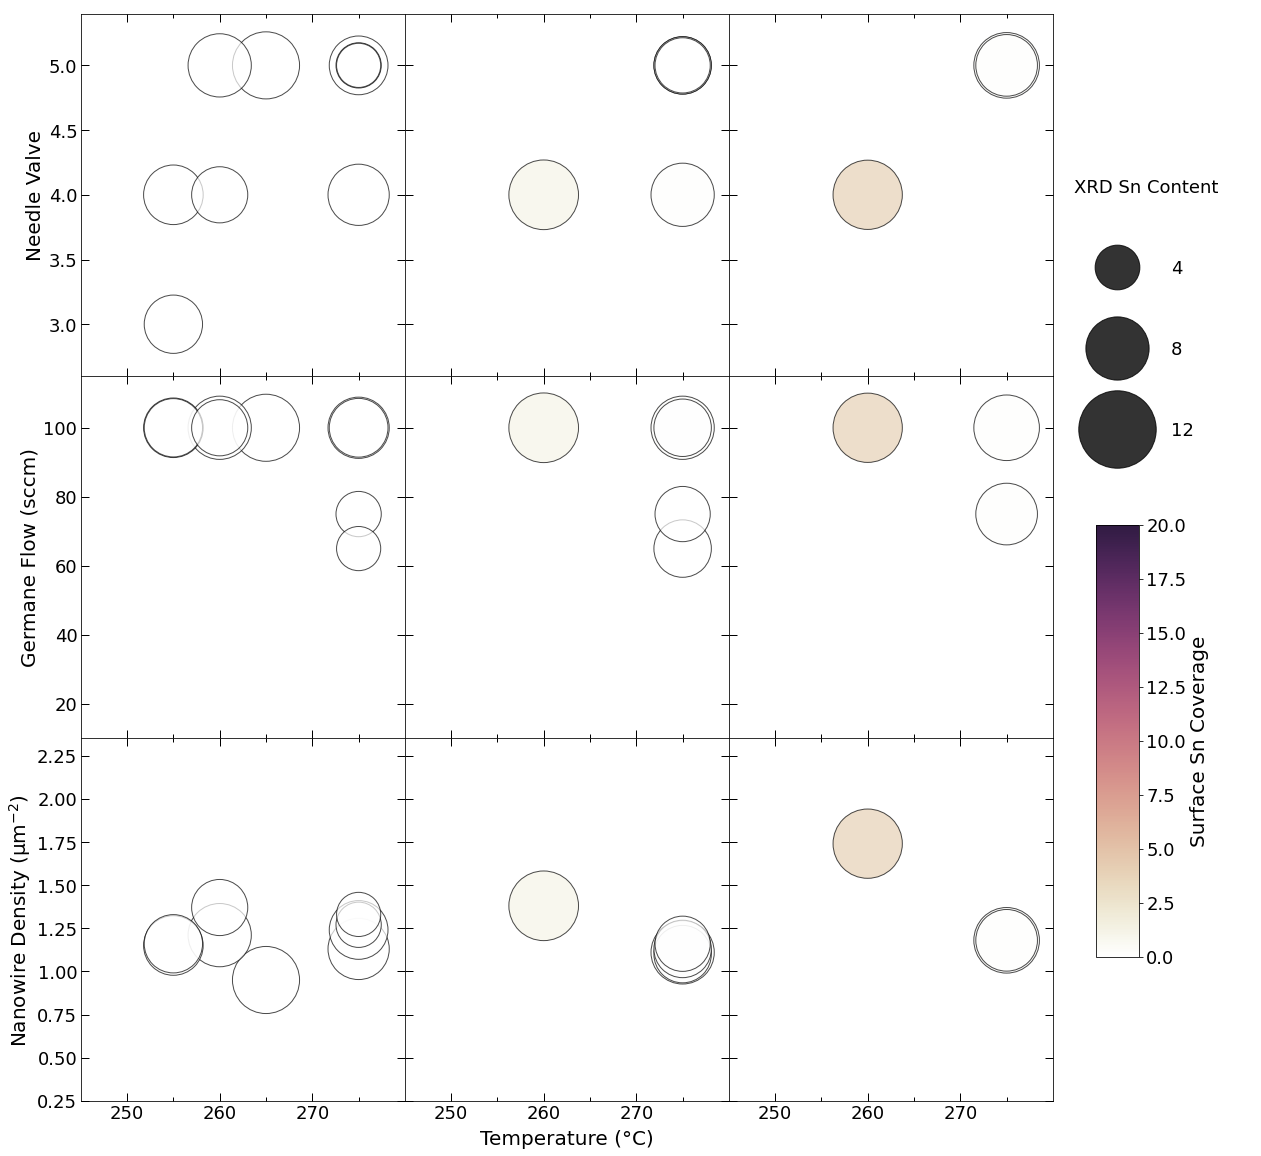

In [0]:
# Only for actually measured XRD
df_Center = df_Center.dropna()
df_Andrew = df_Andrew.dropna()
df_Reflectometry = df_Reflectometry.dropna()

SnContentLegendList = [4, 8, 12]
circleScaleFactor = 500
centerPositionColormap = RedMapMPL
andrewPositionColormap = RedMapMPL
reflectometryPositionColormap = RedMapMPL
plotAlpha = 0.7

# Use the value from all the 
colorbarMax = df['Sn Surface Coverage'].max()
# colorbarMax = 5

# Use the same ranges as full dataset

# percentRangeOverdraw = 0.2 # add 20% of range on each side for circle's to fit nicely

# temperatureMin = df_Center["Temperature"].min()
# temperatureMax = df_Center["Temperature"].max()
# temperatureRange = temperatureMax - temperatureMin
# lowerXLim = temperatureMin - percentRangeOverdraw*temperatureRange
# upperXLim = temperatureMax + percentRangeOverdraw*temperatureRange

# nvMin = df_Center["NV"].min()
# nvMax = df_Center["NV"].max()
# nvRange = nvMax - nvMin
# lowerYLimNV = nvMin - percentRangeOverdraw*nvRange
# upperYLimNV = nvMax + percentRangeOverdraw*nvRange


# germaneFlowMin = df_Center["Germane Flow"].min()
# germaneFlowMax = df_Center["Germane Flow"].max()
# germaneFlowRange = germaneFlowMax - germaneFlowMin
# lowerYLimGermaneFlow = germaneFlowMin - percentRangeOverdraw*germaneFlowRange
# upperYLimGermaneFlow = germaneFlowMax + percentRangeOverdraw*germaneFlowRange

# wireDensityMin = min(df_Center["Wire Density"].min(), df_Andrew["Wire Density"].min(), df_Reflectometry["Wire Density"].min())
# wireDensityMax = max(df_Center["Wire Density"].max(), df_Andrew["Wire Density"].max(), df_Reflectometry["Wire Density"].max())
# wireDensityRange = wireDensityMax - wireDensityMin
# lowerYLimWireDensity = wireDensityMin - percentRangeOverdraw*wireDensityRange
# upperYLimWireDensity = wireDensityMax + percentRangeOverdraw*wireDensityRange

fig, axs = plt.subplots(nrows = 3, ncols = 3, sharey = 'row', sharex = True, figsize=(9,9))
fig.set_figwidth(20)
fig.set_figheight(20)
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
fig.add_subplot(111, frameon = False, facecolor = 'white')

l1 = axs[0][0].scatter(df_Center['Temperature'], df_Center['NV'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[0][0].set_ylim(lowerYLimNV, upperYLimNV)
axs[0][0].set_ylabel("Needle Valve")

l2 = axs[0][1].scatter(df_Andrew['Temperature'], df_Andrew['NV'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l3 = axs[0][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['NV'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l4 = axs[1][0].scatter(df_Center['Temperature'], df_Center['Germane Flow'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[1][0].set_ylim(lowerYLimGermaneFlow, upperYLimGermaneFlow)
axs[1][0].set_ylabel("Germane Flow (sccm)")

l5 = axs[1][1].scatter(df_Andrew['Temperature'], df_Andrew['Germane Flow'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l6 = axs[1][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['Germane Flow'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l7 = axs[2][0].scatter(df_Center['Temperature'], df_Center['Wire Density'], s=circleScaleFactor*df_Center['XRD Sn Content'], c=df_Center['Sn Surface Coverage'], cmap=centerPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)
axs[2][0].set_ylim(lowerYLimWireDensity, upperYLimWireDensity)
axs[2][0].set_ylabel("Nanowire Density (μm$^{-2}$)")

l8 = axs[2][1].scatter(df_Andrew['Temperature'], df_Andrew['Wire Density'], s=circleScaleFactor*df_Andrew['XRD Sn Content'], c=df_Andrew['Sn Surface Coverage'], cmap=andrewPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

l9 = axs[2][2].scatter(df_Reflectometry['Temperature'], df_Reflectometry['Wire Density'], s=circleScaleFactor*df_Reflectometry['XRD Sn Content'], c=df_Reflectometry['Sn Surface Coverage'], cmap=reflectometryPositionColormap, edgecolors = 'black', vmin = 0, vmax = colorbarMax, alpha = plotAlpha)

for axList in axs:
  for ax in axList:
    ax.set_xlim(lowerXLim+0.01,upperXLim-0.01)
    ax.minorticks_on()
    ax.tick_params(which='both', axis='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', axis='both', direction='in', length=8, width=1)
    ax.tick_params(which='minor', axis='both', direction='in', length=4, width=1)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(1))


plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Temperature (°C)")
# This would set a centered y label
# plt.ylabel("NV")

fig.subplots_adjust(right=0.8)

# [horizontal position, vertical position, relative width, relative height]
colorbar_ax = fig.add_axes([0.83, 0.225, 0.03, 0.3])
cbar = fig.colorbar(l1, cax = colorbar_ax)
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.set_ylabel('Surface Sn Coverage')

# [horizontal position, vertical position, relative width, relative height]
legend_ax = fig.add_axes([0.85, 0.525, 0.03, 0.3])
legend_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
legend_ax.axis('off')
hiddenLegendHandles = []
hiddenLegendLabels = []
for SnContent in SnContentLegendList:
    hiddenLegendPlot = plt.scatter([], [], c='k', alpha=0.8, s=circleScaleFactor*SnContent)
    tempHandle, tempLabel = hiddenLegendPlot.legend_elements(prop="sizes")
    hiddenLegendHandles.extend(tempHandle)
    hiddenLegendLabels.extend(tempLabel)

plotLegend = legend_ax.legend(hiddenLegendHandles, SnContentLegendList, title = "XRD Sn Content", numpoints = 1, scatterpoints = 5, frameon = False, labelspacing = 3.5, handletextpad = 2, borderaxespad = 0,
                        loc='center', borderpad = 2)

fig.savefig('GeSnVisualization_RealData.png', facecolor = 'white', edgecolor='none')


In [0]:
df